In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
hdi = pd.read_csv("data/hdi_web.csv")
suicide = pd.read_csv("data/processed_web.csv")
homicide = pd.read_csv("data/homicide_web.csv")

In [18]:
hdi_analysis = hdi[hdi["Sex"] == "All"]
hdi_analysis = hdi_analysis.drop(["Sex"], axis = 1)
hdi_analysis.head(5)

,Country Code,Country Name,Year,hdi
0,AFG,Afghanistan,1999,0.332
3,AFG,Afghanistan,2000,0.335
6,AFG,Afghanistan,2001,0.337
9,AFG,Afghanistan,2002,0.362
12,AFG,Afghanistan,2003,0.376


In [19]:
suicide_analysis = suicide[(suicide["Sex"] == "All") & (suicide["Age Group"] == "[All]")]
suicide_analysis = suicide_analysis.drop(["Region Code", "Region Name", "Age group code", "Sex", "Age Group", 
                                          "Percentage of self-harm deaths out of total deaths", "Age-standardized death rate per 100 000 standard population"] , axis = 1)
suicide_analysis = suicide_analysis.rename(columns = {"Death rate per 100 000 population" : "Suicide rate"})
suicide_analysis.head(5)

,Country Code,Country Name,Year,Number,Suicide rate
0,ALB,Albania,1999,154.0,4.565127
63,ALB,Albania,2000,57.0,1.830443
126,ALB,Albania,2001,119.0,3.877137
189,ALB,Albania,2002,133.0,4.312371
252,ALB,Albania,2003,124.0,3.996437


In [20]:
homicide.head(5)

,Iso3_code,Country,Region,Indicator,Sex,Year,Counts,Homicide rate per 100 000 population
0,ABW,Aruba,Americas,homicide,Female,1999,1,2.22
1,ABW,Aruba,Americas,homicide,Female,2001,2,4.24
2,ABW,Aruba,Americas,homicide,Female,2002,1,2.09
3,ABW,Aruba,Americas,homicide,Female,2003,1,2.07
4,ABW,Aruba,Americas,homicide,Female,2004,0,0.00


In [21]:
homicide_analysis = homicide[homicide["Sex"] == "All"]
homicide_analysis = homicide_analysis.drop(["Region", "Sex", "Indicator"], axis=1)
homicide_analysis = homicide_analysis.rename(columns = {"Homicide rate per 100 000 population" : "Homicide rate", "Country" : "Country Name", "Iso3_code" : "Country Code" })
homicide_analysis.head(5)

,Country Code,Country Name,Year,Counts,Homicide rate
30,ABW,Aruba,1999,2,2.30
31,ABW,Aruba,2001,4,4.41
32,ABW,Aruba,2002,5,5.45
33,ABW,Aruba,2003,4,4.31
34,ABW,Aruba,2004,2,2.14


In [32]:
merged_data = suicide_analysis.merge(hdi_analysis, on = ["Country Code", "Country Name", "Year"]).merge(homicide_analysis, on = ["Country Code", "Country Name", "Year"])
merged_data.head(5)

,Country Code,Country Name,Year,Number,Suicide rate,hdi,Counts,Homicide rate
0,ALB,Albania,1999,154.0,4.565127,0.669,532,16.58
1,ALB,Albania,2000,57.0,1.830443,0.677,131,4.12
2,ALB,Albania,2001,119.0,3.877137,0.684,220,6.98
3,ALB,Albania,2002,133.0,4.312371,0.689,216,6.92
4,ALB,Albania,2003,124.0,3.996437,0.696,166,5.37


In [34]:
# Calculate correlation coefficients
correlation_hdi_suicide = merged_data['hdi'].corr(merged_data['Suicide rate'])
correlation_hdi_homicide = merged_data['hdi'].corr(merged_data['Homicide rate'])
correlation_suicide_homicide = merged_data['Suicide rate'].corr(merged_data['Homicide rate'])

# Print correlation coefficients
print(f"Correlation between HDI and Suicide Rate: {correlation_hdi_suicide:.2f}")
print(f"Correlation between HDI and Homicide Rate: {correlation_hdi_homicide:.2f}")
print(f"Correlation between Suicide Rate and Homicide Rate: {correlation_suicide_homicide:.2f}")

Correlation between HDI and Suicide Rate: 0.27
Correlation between HDI and Homicide Rate: -0.53
Correlation between Suicide Rate and Homicide Rate: -0.20


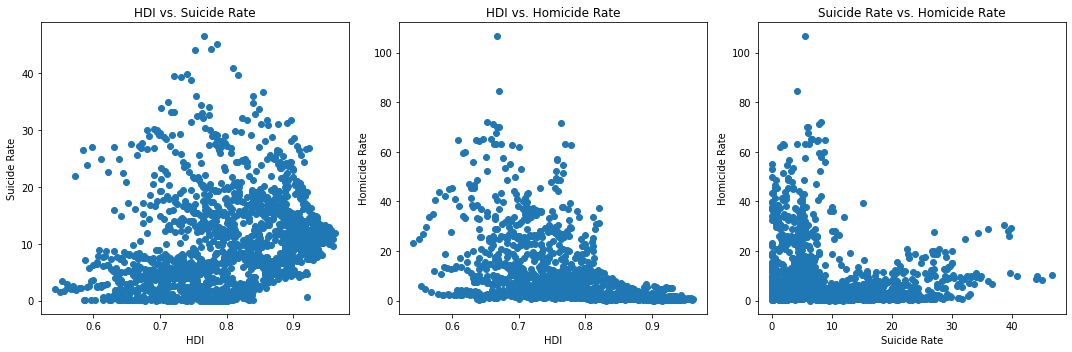

In [36]:
# Create separate scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot: HDI vs. Suicide Rate
#plt.subplot(1, 3, 1)
plt.scatter(merged_data['hdi'], merged_data['Suicide rate'])
plt.xlabel('HDI')
plt.ylabel('Suicide Rate')
plt.title('HDI vs. Suicide Rate')

# Scatter plot: HDI vs. Homicide Rate
plt.subplot(1, 3, 2)
plt.scatter(merged_data['hdi'], merged_data['Homicide rate'])
plt.xlabel('HDI')
plt.ylabel('Homicide Rate')
plt.title('HDI vs. Homicide Rate')

# Scatter plot: Suicide Rate vs. Homicide Rate
plt.subplot(1, 3, 3)
plt.scatter(merged_data['Suicide rate'], merged_data['Homicide rate'])
plt.xlabel('Suicide Rate')
plt.ylabel('Homicide Rate')
plt.title('Suicide Rate vs. Homicide Rate')

plt.tight_layout()
plt.show()

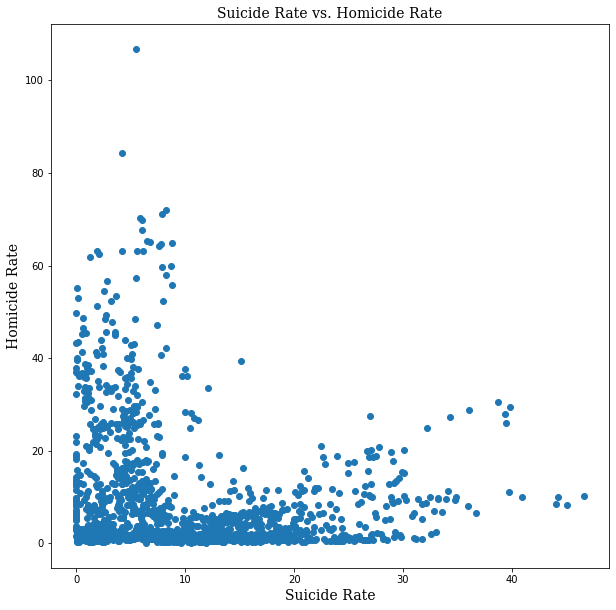

In [56]:
# Scatter plot: Suicide Rate vs. Homicide Rate

# Define font properties
font_labels = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 18}
font_title = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 20}


fig = plt.figure(figsize=(10, 10))
fig.set_facecolor("white")
plt.scatter(merged_data['Suicide rate'], merged_data['Homicide rate'])
plt.xlabel('Suicide Rate', fontdict = font)
plt.ylabel('Homicide Rate', fontdict = font)
plt.title('Suicide Rate vs. Homicide Rate', fontdict = font)

plt.show()

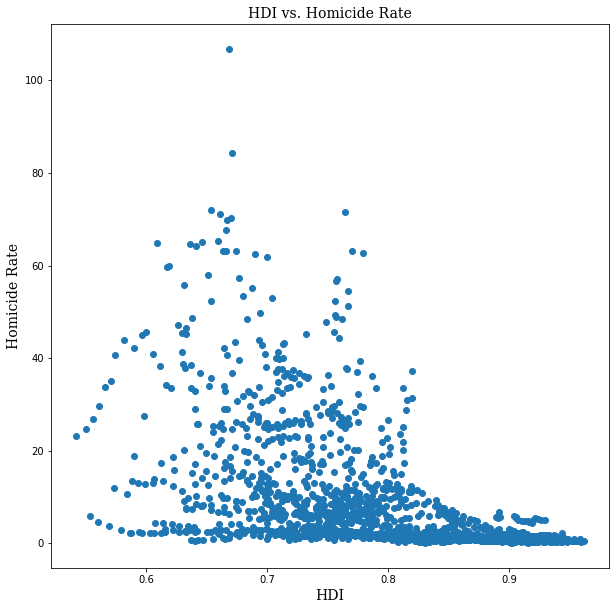

In [57]:

fig = plt.figure(figsize=(10, 10))
fig.set_facecolor("white")
plt.scatter(merged_data['hdi'], merged_data['Homicide rate'])
plt.xlabel('HDI', fontdict = font)
plt.ylabel('Homicide Rate', fontdict = font)
plt.title('HDI vs. Homicide Rate', fontdict = font)

plt.show()

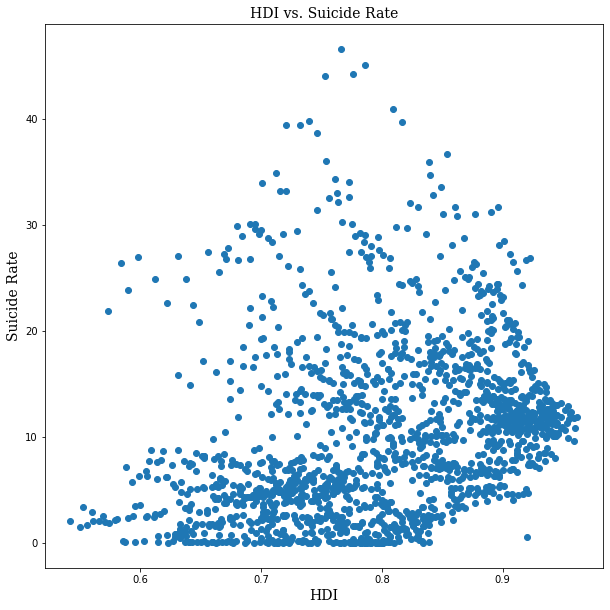

In [59]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor("white")
plt.scatter(merged_data['hdi'], merged_data['Suicide rate'])
plt.xlabel('HDI', fontdict = font)
plt.ylabel('Suicide Rate', fontdict = font)
plt.title('HDI vs. Suicide Rate', fontdict = font)

plt.show()